# Diabetes (clustering)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
diabetes=datasets.load_diabetes()


# 1) sklearn 이용 x 

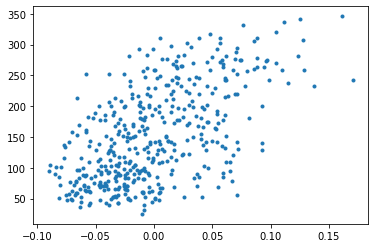

In [3]:
X_p=diabetes.data[:,2] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
plt.plot(X_p,X_d,'.')

In [4]:
# 임의의 중심점 설정(당뇨 진행 정도를 기준으로 설정함)
c1=[0,0]
c2=[0,100]
c3=[0,200]
c4=[0,300]
cen=[[0,0,0,0],
     [0,100,200,300]]

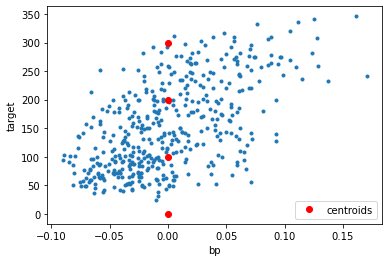

In [5]:
# 데이터와 내가 설정한 임의의 중심점 
plt.plot(X_p,X_d,'.')
plt.plot(cen[0],cen[1],'ro',label='centroids')
plt.legend(loc=4)
plt.xlabel('bp')
plt.ylabel('target');
plt.show()

## Training

In [6]:
number=0
while number<10:


    # 중심점과 데이터사이의 최소거리
    r1=(X_p-c1[0])**2 + (X_d-c1[1])**2
    r2=(X_p-c2[0])**2 + (X_d-c2[1])**2
    r3=(X_p-c3[0])**2 + (X_d-c3[1])**2
    r4=(X_p-c4[0])**2 + (X_d-c4[1])**2
    
    # 각각 최소가되는 점의 index array g를 만듬
    g=np.array([])
    for i in range(len(r1)):
        g=np.append(g,np.argmin([r1[i],r2[i],r3[i],r4[i]]))

    ## 중심점의 위치를 구함
    a=[]
    for j in range(4):
        a.append([np.mean([X_p[i] for i in np.where(g==j)]), np.mean([X_d[i] for i in np.where(g==j)])]) # 중심점의 위치
    

    # 점과 중심점 사이의 거리를 다시 구해주어야함
    c1= [a[0][0],a[0][1]]
    c2= [a[1][0],a[1][1]]
    c3= [a[2][0],a[2][1]] # 새로운 중심점을 넣어줌
    c4= [a[3][0],a[3][1]]
    
    number+=1



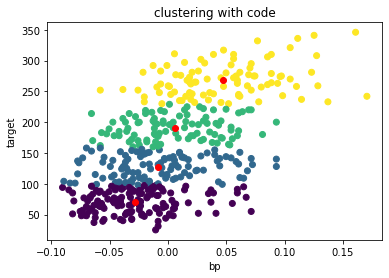

중심점의 위치:[[-2.80765575e-02  7.00625000e+01]
 [-8.18520904e-03  1.27663636e+02]
 [ 5.84084123e-03  1.91041667e+02]
 [ 4.76377882e-02  2.69250000e+02]]


In [7]:

plt.scatter(X_p,X_d,c=g)
plt.plot(a[0][0],a[0][1],'ro')
plt.plot(a[1][0],a[1][1],'ro')
plt.plot(a[2][0],a[2][1],'ro')
plt.plot(a[3][0],a[3][1],'ro')
plt.title('clustering with code')
plt.xlabel('bp')
plt.ylabel('target')
plt.show()
print("중심점의 위치:{}".format(np.array(a)))

# 2) sklearn 이용

In [8]:
from sklearn.cluster import KMeans

In [9]:
X=[X_p,X_d]

In [10]:
data=np.transpose(X) 

In [11]:
km=KMeans(n_clusters=4)

In [12]:
km.fit(data)

KMeans(n_clusters=4)

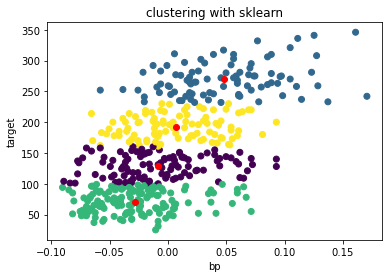

중심점의 위치: [[-8.28247281e-03  1.29055046e+02]
 [ 4.81756528e-02  2.70122222e+02]
 [-2.77768597e-02  7.06462585e+01]
 [ 6.77269959e-03  1.92500000e+02]]


In [13]:
plt.scatter(X_p,X_d,c=km.labels_)
plt.plot(km.cluster_centers_[0][0],km.cluster_centers_[0][1],'ro')
plt.plot(km.cluster_centers_[1][0],km.cluster_centers_[1][1],'ro')
plt.plot(km.cluster_centers_[2][0],km.cluster_centers_[2][1],'ro')
plt.plot(km.cluster_centers_[3][0],km.cluster_centers_[3][1],'ro')
plt.xlabel('bp')
plt.ylabel('target')
plt.title('clustering with sklearn')
plt.show()
print('중심점의 위치: {}'.format(km.cluster_centers_))

## Result plot

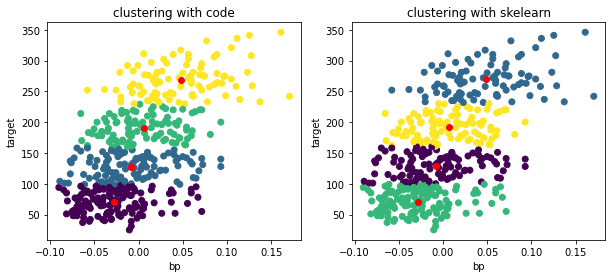

code로 구한 중심점 위치: [[-2.80765575e-02  7.00625000e+01]
 [-8.18520904e-03  1.27663636e+02]
 [ 5.84084123e-03  1.91041667e+02]
 [ 4.76377882e-02  2.69250000e+02]]
sklearn으로 구한 중심점 위치: [[-8.28247281e-03  1.29055046e+02]
 [ 4.81756528e-02  2.70122222e+02]
 [-2.77768597e-02  7.06462585e+01]
 [ 6.77269959e-03  1.92500000e+02]]


In [14]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X_p,X_d,c=g)
plt.plot(a[0][0],a[0][1],'ro')
plt.plot(a[1][0],a[1][1],'ro')
plt.plot(a[2][0],a[2][1],'ro')
plt.plot(a[3][0],a[3][1],'ro')
plt.xlabel('bp')
plt.ylabel('target')
plt.title('clustering with code')

plt.subplot(122)
plt.scatter(X_p,X_d,c=km.labels_)
plt.plot(km.cluster_centers_[0][0],km.cluster_centers_[0][1],'ro')
plt.plot(km.cluster_centers_[1][0],km.cluster_centers_[1][1],'ro')
plt.plot(km.cluster_centers_[2][0],km.cluster_centers_[2][1],'ro')
plt.plot(km.cluster_centers_[3][0],km.cluster_centers_[3][1],'ro')
plt.xlabel('bp')
plt.ylabel('target')
plt.title('clustering with skelearn')

plt.show()


print("code로 구한 중심점 위치: {}".format(np.array(a)))

print("sklearn으로 구한 중심점 위치: {}".format(km.cluster_centers_))


# 3) k를 결정하는 방법

## Elbow method

### 설명

Elbow method는 데이터의 cluster number을 결정하는 경험적인 방법입니다. cluster data 사이의 거리의 제곱을 나타내는 함수인 inertia_ 함수를 통해 cluster number 와 inertia_ 간의 그래프를 그린 후, elbow의 끝부분이라고 여겨지는 부분(inertia_가 급격히 감소하는 부분.elbow point.)을 그래프에서 찾아내어 그를 최적의 optimal cluster number 이라 생각 한 후 그것을 이용해 clustering을 진행합니다. 

그렇지만, 이 방법은 완전히 정확하지가 않습니다. elbow point는 그래프를 보며 직접 생각하여야 하기 때문에, elbow point가 눈으로 보기엔 명확하지 않아 2개 이상의 점에서 어떤 점이 elbow point 인지 고민하게 되는 경우가 충분히 생길 수 있습니다. 아니면, elbow point가 눈에 보이지 않는 데이터도 존재 할 수 있습니다.

따라서, 직접 사람이 optimal cluster number을 지정하는 것보다 조금이라도 더 정확 할지도 모르는 단순한 방법을 고안하였습니다. 이는 자신이 설정한 cluster number 범위와 inertia_ 그래프의 처음과 끝을 이은 직선과 나타난 그래프의 각각의 cluster number에 해당하는 점과의 거리를 단순히 계산하여 제일 멀리 있는 점을 찾는 방법입니다. 위에서 설명한 바와 같이 inertia_가 급격히 감소하는 부분을 elbow point로 생각한다고 하였으니, 이 점은 즉 직선과 점사이의 거리가 최대가 되는 지점과 비슷한 말이 됩니다.

그래서, 밑의 방법을 통해 최적의 cluster number을 찾아보았습니다.

### code

In [15]:
# SSE 와 cluster number K
SSE=[] # sum of squares
K = range(1,10) # cluster number
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

In [16]:
# K와 SSE 그래프에서 처음과 끝점을 잇는 직선을 그리기 위함 
def f1(x):
    return a1*x
def f2(x):
    return a1*x+b
n=8 # 위에서 설정한 cluster number의 갯수
a1=(SSE[-1]-SSE[0])/n
b=SSE[0]-f1(1)
x=np.linspace(1,9,100)


In [17]:
# 직선과 점사이의 거리 
d=[]
for num in range(1,10):
    d=np.append(d,np.abs(a1*num-SSE[num-1]+b)/np.sqrt(a1**2+1))

In [18]:
distance_max_index=d.argmax() # 직선과 점사이의 거리가 최대인 부분의 index


## Result plot

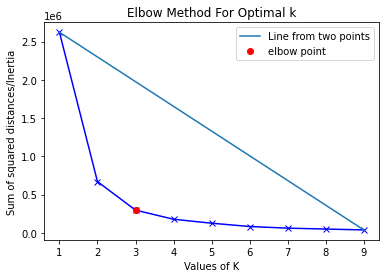

In [19]:
## elbow point와 처음과 끝점을 지나는 직선의 그래프
plt.plot(K,SSE,'bx-')
plt.plot(x,f2(x),label='Line from two points')
plt.plot(distance_max_index+1,SSE[distance_max_index],'ro',label='elbow point') # 직선과의 거리가 최고인 부분을 elbow point로 예상할 수 있음
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.legend(loc='best')
plt.show()

## 예측한 Optimal cluster number로 clustering

In [20]:
optimal=KMeans(n_clusters=distance_max_index+1)

In [21]:
optimal.fit(data)

KMeans(n_clusters=3)

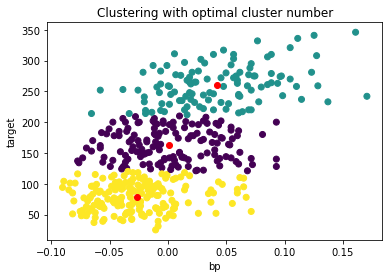

중심점의 위치: [[ 1.31673422e-03  1.62564626e+02]
 [ 4.21887790e-02  2.60630631e+02]
 [-2.65027956e-02  7.83478261e+01]]


In [22]:
plt.scatter(X_p,X_d,c=optimal.labels_)
plt.plot(optimal.cluster_centers_[0][0],optimal.cluster_centers_[0][1],'ro')
plt.plot(optimal.cluster_centers_[1][0],optimal.cluster_centers_[1][1],'ro')
plt.plot(optimal.cluster_centers_[2][0],optimal.cluster_centers_[2][1],'ro')
plt.xlabel('bp')
plt.ylabel('target')
plt.title('Clustering with optimal cluster number');
plt.show()

print('중심점의 위치: {}'.format(optimal.cluster_centers_))